# Обработка пропущенных значений. Кодирование категориальных признаков

## Описание лабораторной

Из-за пропущенных значений и категориальных признаков невозможно обучать большинство моделей ML, поэтому с ними необходимо работать.

Существует большое количество методов для заполнения пропусков, однако наиболее распространенными являются статистические и машинные подходы.

В задаче бывает тяжело определить, какой метод себя покажет лучше, поэтому разумно на этапе заполнения пропусков сгенерировать 2 датасета с помощью каждого подхода. И потом проверить их работоспособность на основании метрик качества.

С категориальными признаками проще, достаточно выбрать один наиболее подходящий подход и использовать его.

В данной лабораторной работе вам необходимо закодировать категориальные признаки и обработать пропуски в обучающей выборке, которую вы получили в ЛР №2. А потом результаты обработки перенести на тестовую выборку.

1) Выполните кодировку категориальных признаков на обучающем датасете (обучите кодировщик на обучаюшем датасете). Отберите категориальные столбцы и к ним примените кодирование. Обратите внимание на семантику категориальных признаков и их структуру:
  - если категории равнозначные, можно применить One-Hot кодировщик (и откинуть один любой столбец);
  - если в категориях есть отношение порядка, можно применить Label кодировщик (но обязательно контролируйте, чтобы метки сохраняли отношение порядка категорий);
  - если категории смешанные, можно применять Target кодировщик (в целом, его можно применять для каждого случая, однако будьте внимательны с подбором параметров).
2) Примените обученный кодировщик категориальных признаков к тестовым данным. Следите, чтобы не было утечки данных!

3) Выполните заполнение пропущенных значений в обучающем датасете двумя способами:
  - используя статистические подходы (для каждого признака с пропусками определите пул значений, которым можно заполнить этот столбец, для каждого значения пула постройте 
  гистограммы до заполнения пропусков и после заполнения этим значением, вычислите значение KL-дивергенции, на основе всей этой информации отберите значение, которым можно заполнить пропуск);
  - используя машинные подходы (постройте модель MICE/IterativeImputer/KNNImputer для заполнения пропусков);
4) Примените полученные результаты к тестовым данным (обязательно обратите внимание, что значения для заполнения вычисляются на основании обучающей выборке, а потом переносятся на тестовую)

`Предсказание Гармонии Бессмертия`

Для того, чтобы решить поставленную задачу, необходимо обработать данные, а после с их помощью построить модели и оценить каждую из них, чтобы отобрать наилучшую -- ту, которая лучше предсказыает Гармонию Бессмертия.

`Содержание ноутбука`

**Table of contents**<a id='toc0_'></a>    
- 1. [Раздел 1. Обработка входных данных и датасета](#toc1_)    
  - 1.1. [Research](#toc1_1_)    
    - 1.1.1. [Загрузка исходных данных](#toc1_1_1_)    
    - 1.1.2. [Анализ типов данных и значений признаков](#toc1_1_2_)    
      - 1.1.2.1. [Коррекция типов данных исходного датасета](#toc1_1_2_1_)    
      - 1.1.2.2. [Уменьшение размера типов данных признаков](#toc1_1_2_2_)   
      - 1.1.2.3. [Первичное отбрасывание признаков](#toc1_1_2_3_)
    - 1.1.3. [Формирование обучающей и тестирующей выборок](#toc1_1_3_) 
    - 1.1.4. [Обработка пропущенных значений](#toc1_1_4_)   
      - 1.1.4.1. [Обработка вещественных признаков](#toc1_1_4_1_)    
      - 1.1.4.2. [Обработка категориальных признаков](#toc1_1_4_2_)  
    - 1.1.5. [Кодирование категориальных признаков](#toc1_1_5_)  
 
    
  
<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

**Table of contents**<a id='toc0_'></a>    
- 1. [Раздел 1. Обработка входных данных и датасета](#toc1_)    
  - 1.1. [Research](#toc1_1_)    
    - 1.1.1. [Загрузка исходных данных](#toc1_1_1_)    
    - 1.1.2. [Анализ типов данных и значений признаков](#toc1_1_2_)    
      - 1.1.2.1. [Выделение фрагментов исходного датасета](#toc1_1_2_1_)    
      - 1.1.2.2. [Анализ выделенных фрагментов](#toc1_1_2_2_)    
    - 1.1.3. [Формирование обучающей и тестирующей выборок](#toc1_1_3_)    
    - 1.1.4. [Обработка категориальных признаков](#toc1_1_4_)    
      - 1.1.4.1. [Выделение фрагментов категориальных данных](#toc1_1_4_1_)    
      - 1.1.4.2. [Кодирование категориальных данных](#toc1_1_4_2_)    
        - 1.1.4.2.1. [Представление категорий, в которых есть отношение порядка](#toc1_1_4_2_1_)    
        - 1.1.4.2.2. [Представление категорий сложной структуры](#toc1_1_4_2_2_)    
        - 1.1.4.2.3. [Представление равнозначных категорий](#toc1_1_4_2_3_)    
      - 1.1.4.3. [Формирование категориального датасета](#toc1_1_4_3_)    
    - 1.1.5. [Обработка вещественных признаков](#toc1_1_5_)    
      - 1.1.5.1. [Выделение вещественного датасета](#toc1_1_5_1_)    
      - 1.1.5.2. [Заполнение пропущенных значений в датасете](#toc1_1_5_2_)    
        - 1.1.5.2.1. [Первичный анализ пропущенных значений](#toc1_1_5_2_1_)    
        - 1.1.5.2.2. [Визуализация пропущенных значений](#toc1_1_5_2_2_)    
        - 1.1.5.2.3. [Заполнение пропущенных значений](#toc1_1_5_2_3_)    
    - 1.1.6. [Формирование предобработанного датасета](#toc1_1_6_)    
  - 1.2. [Production](#toc1_2_)    
  - 1.3. [`Выводы по разделу`](#toc1_3_)    
- 2. [Раздел 2. Генерация признаков](#toc2_)    
  - 2.1. [Research](#toc2_1_)    
    - 2.1.1. [Генерация сводной статистической таблицы численного датасета](#toc2_1_1_)    
    - 2.1.2. [Применение скалирования к вещественным признакам](#toc2_1_2_)    
      - 2.1.2.1. [Применение стандартизации к вещественным признакам](#toc2_1_2_1_)    
      - 2.1.2.2. [Применение MinMax-преобразования к вещественным признакам](#toc2_1_2_2_)    
    - 2.1.3. [Проверка наличия мультиколлинеарности в данных](#toc2_1_3_)    
    - 2.1.4. [Генерация нового признакового пространства](#toc2_1_4_)    
      - 2.1.4.1. [Понижение пространства для исходных данных](#toc2_1_4_1_)    
      - 2.1.4.2. [Понижение пространства для стандартизированных данных](#toc2_1_4_2_)    
      - 2.1.4.3. [Понижение пространства для данных после MinMax-преобразования](#toc2_1_4_3_)    
    - 2.1.5. [Отбор признаков при помощи устранения мультиколлинеарности](#toc2_1_5_)    
  - 2.2. [Production](#toc2_2_)    
  - 2.3. [`Выводы по разделу`](#toc2_3_)    
- 3. [Раздел 3. Обучение ML-моделей](#toc3_)    
  - 3.1. [Research](#toc3_1_)    
    - 3.1.1. [Построение параметрических моделей](#toc3_1_1_)    
      - 3.1.1.1. [Формирование вариационного ряда](#toc3_1_1_1_)    
      - 3.1.1.2. [Проверка ряда на экспоненциальное распределение](#toc3_1_1_2_)    
      - 3.1.1.3. [Проверка ряда на распределение Вейбулла](#toc3_1_1_3_)    
  - 3.2. [Production](#toc3_2_)    
    - 3.2.1. [Модель пропорциональной опасности Кокса](#toc3_2_1_)    
    - 3.2.2. [Аддитивная модель Аалена](#toc3_2_2_)    
  - 3.3. [`Выводы по разделу`](#toc3_3_)    
- 4. [Раздел 4. Кросс-валидация и подбор гиперпараметров](#toc4_)    
  - 4.1. [Production](#toc4_1_)    
    - 4.1.1. [Обучение моделей на данных после PCA](#toc4_1_1_)    
      - 4.1.1.1. [Обучение модели Кокса](#toc4_1_1_1_)    
        - 4.1.1.1.1. [Обучение на классическом датасете](#toc4_1_1_1_1_)    
        - 4.1.1.1.2. [Обучение на стандартизированном датасете](#toc4_1_1_1_2_)    
        - 4.1.1.1.3. [Обучение на датасете с MinMax-преобразованием](#toc4_1_1_1_3_)    
      - 4.1.1.2. [Обучение аддитивной модели Аалена](#toc4_1_1_2_)    
        - 4.1.1.2.1. [Обучение на классическом датасете](#toc4_1_1_2_1_)    
        - 4.1.1.2.2. [Обучение на стандартизированном датасете](#toc4_1_1_2_2_)    
        - 4.1.1.2.3. [Обучение на датасете с MinMax-преобразованием](#toc4_1_1_2_3_)    
    - 4.1.2. [Обучение моделей на данных после ручного отбора признаков](#toc4_1_2_)    
      - 4.1.2.1. [Обучение модели Кокса](#toc4_1_2_1_)    
        - 4.1.2.1.1. [Обучение на классическом датасете](#toc4_1_2_1_1_)    
        - 4.1.2.1.2. [Обучение на стандартизированном датасете](#toc4_1_2_1_2_)    
        - 4.1.2.1.3. [Обучение на датасете с MinMax-преобразованием](#toc4_1_2_1_3_)    
      - 4.1.2.2. [Обучение аддитивной модели Аалена](#toc4_1_2_2_)    
        - 4.1.2.2.1. [Обучение на классическом датасете](#toc4_1_2_2_1_)    
        - 4.1.2.2.2. [Обучение на стандартизированном датасете](#toc4_1_2_2_2_)    
        - 4.1.2.2.3. [Обучение на датасете с MinMax-преобразованием](#toc4_1_2_2_3_)    
  - 4.2. [`Выводы по разделу`](#toc4_2_)    
- 5. [Раздел 5. Предсказание на новых данных](#toc5_)    
  - 5.1. [Production](#toc5_1_)    
  - 5.2. [`Выводы по разделу`](#toc5_2_)    
- 6. [`Выводы по исследованию`](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

`Структура ноутбука`

Каждый раздел состоит из двух частей:
 - `research (необязательная)` — включает в себя вспомогательные исследования, тесты, визуализации, диаграммы и аналитические выкладки, используемые в процессе работы;
 - `production (обязательная)` — содержит финальный, чистый и воспроизводимый код, который используется для запуска и проверки.

При этом:
1. research-часть не обязательна и может отсутствовать в некоторых разделах;
2. production-часть не содержит закомментированный код и ветки решений, которые не используются в ходе решения;
3. код в Production-части должен быть оформлен с принципами воспроизводимости и чистоты, избежания лишних промежуточных вычислений и отладочных выводов, и **он будет использоваться для переноса в PY-файлы в будущем**.


`Формирование окружения для работы`

Первоначально необходимо подготовить окружение для работы с данными и их моделирования. Чтобы не возникало конфликтов виртуальной среды Python, зафиксируем используемые в ходе исследования версии основных библиотек и фреймворков, которые будут использоваться далее. А также пропишем последовательность команд для формирования среды.

Работа справедлива для версии > `Python 3.13`. Чтобы все наши библиотеки друг с другом не конфликтовали.

Первоначально установим необходимые библиотеки при помощи venv в изолированное виртуальное окружение.

Создать окружение:
```
python3.11 -m venv venv
``` 

Активировать:


macOS/Linux
```
source venv/bin/activate
```

Windows
```
venv\Scripts\activate
```

Установить библиотеки:

```pip install numpy pandas```

Сохранить зависимости:

```pip freeze > requirements.txt```

Установить из файла:

```pip install -r requirements.txt```

Обновить все:

```pip install --upgrade -r requirements.txt```

Посмотреть библиотеки:

```pip list```

Деактивировать:

```deactivate```

Удалить окружение:


```
rm -rf venv  # macOS/Linux
rd /s /q venv  # Windows
```

Средствами Python импортируем необходимые для работы библиотеки. В силу традиции, присвоим некоторым модулям псевдонимы (например, pd для pandas и т.д.). Роль импортируемых библиотек и фреймворков представлена в таблице. 

| Наименование библиотеки | Описание                                                                             |
| ----------------------- | ------------------------------------------------------------------------------------ |
| pandas                  | Библиотека для работы таблицами и плоскими данными                                   |
| numpy                   | Библиотека для работы с массивами и матрицами                                        |
| scikit-learn            | Популярная библиотека Python для машинного обучения с алгоритмами классификации, регрессии, кластеризации, понижения размерности и предобработки данных                                       |
| scipy                   | Библиотека для научных вычислений в Python, чуть более “математически продвинутая”, чем numpy                                        |

In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

Для воспроизводимости результатов исследования зафиксируем основание генератора случайных чисел, который используется для деления выборки на обучение и тест, а также при обучении моделей.

In [3]:
seed = 15
np.random.seed(seed)

# 1. <a id='toc1_'></a>[Раздел 1. Обработка входных данных и датасета](#toc0_)

Исходный набор данных представляет из себя набор параметров, необходимых для поддержания мощи (состояния) портала. полученный путем агрегации исторических наблюдений, в котором необходимо предсказать вещественное число Гармонию Бессмертия - главный показатель состояния портала.

| **№** | **Признак** | **Описание** | **Тип данных признака** |
|---|---|---|---|
| **1** | Вектор мощи | Позиция магического механизма, управляющего интенсивностью перехода через портал | Вещественный |
| **2** | Скорость, с которой портал перемещает объект через пространство | Наименование технологической сборки | Вещественный |
| **3** | Приток Силы Потока | Поток магической силы, текущий через ядро портала, обеспечивая его стабильную работу | Вещественный |
| **4** | Ритм магического ядра | Число оборотов магического ядра портала в минуту | Вещественный |
| **5** | Поток Энергий | Число оборотов генератора эфира, преобразующего внешнюю энергию в магическую | Вещественный |
| **6** | Сила Левого Потока | Мощность магического потока, текущего через левую сторону портала, поддерживая его баланс | Вещественный |
| **7** | Сила Правого Потока | Мощность магического потока, текущего через правую сторону портала, обеспечивая равномерное распределение энергии | Вещественный |
| **8** | Пламя Стихий | Температура магической энергии, исходящей из высокого магического источника портала, в градусах Цельсия | Вещественный |
| **9** | Температура вдоха Истока | Температура воздуха, входящего в магический ускоритель портала, в градусах Цельсия | Целочисленный |
| **10** | Температура выдоха Истока | Температура воздуха, исходящего из магического ускорителя портала, в градусах Цельсия | Вещественный |
| **11** | Приток давления Выдоха Истока | Давление магического потока на выходе из магического источника высокого давления | Вещественный |
| **12** | Давление вдоха Истока | Давление воздуха, входящего в магический ускоритель | Вещественный |
| **13** | Давление выдоха Истока | Давление воздуха, исходящего из магического ускорителя | Вещественный |
| **14** | Древний Ветер | Давление древней магической энергии, покидающей портал в виде выхлопного потока | Вещественный |
| **15** | Печать Чародея | Параметр управления магическим впрыском в сердце портала, выраженный в процентах | Вещественный |
| **16** | Эмульсия Истока | Количество магического топлива, подпитывающего портал | Вещественный |
| **17** | Дыхание Истока | Коэффициент, отображающий степень угасания магического ускорителя | Вещественный |
| **18** | Гармония Бессмертия | Коэффициент, указывающий на состояние магического ядра портала и его стабильность, требующий магического восстановления в случае снижения | Вещественный |
| **19** | Тип Вектора Мощи | Метка типа позиции магического механизма | Категориальный |
| **20** | Номер пометки | Уникальный номер записи о работе портала в блакноте | Целочисленный |

Зависимости и формулы прикладной области:

1) Для определения общей мощности потоков сначала сложите значения "Силы Левого Потока" и "Силы Правого Потока", чтобы получить представление о совокупной мощности. 
   
2) Для более полной картины суммарной силы всех потоков дополнительно объедините "Силу Левого Потока", "Силу Правого Потока" и "Приток Силы Потока".
   
3) Общую силу ядра можно оценить, умножив "Ритм магического ядра" на "Приток Силы Потока", что даст показатель общей мощности ядра. 
   
4) Общее давление на выходе можно рассчитать, сложив значения "Притока давления Выдоха Истока" и "Давления выдоха Истока".
   
5) Магическую производительность определяет отношение "Скорости перехода через портал" к "Эмульсии Истока" — это покажет, насколько эффективно топливо поддерживает скорость перехода. 
   
6)  Эффективность самого ядра можно вычислить, разделив его общую силу на "Эмульсию Истока".
    
7)  Для расчёта магической мощности потребуется учесть "Эмульсию Истока", общее давление и разницу между "Пламенем Стихий" и "Температурой вдоха Истока".
   
8)  Оценить степень износа магических источников поможет отношение "Дыхания Истока" к "Гармонии Бессмертия". - утечка данных
    
9)  Абсолютное значение разницы между "Дыханием Истока" и "Гармонией Бессмертия" отразит расхождения в стабильности магии. - утечка данных
    
10) Баланс угасания можно определить, разделив разницу между "Дыханием Истока" и "Гармонией Бессмертия" на "Скорость перехода через портал". - утечка данных

Целевым значением выступает 1 признак:

"Гармония бессмертия" (вещественный коэффициент, указывающий на состояние магического ядра портала и его стабильность, требующий магического восстановления в случае снижения)

Так как мы предсказываем вещественное число, у нас будет `задача регрессии`.

## 1.1. <a id='toc1_1_'></a>[Research](#toc0_)

### 1.1.1. <a id='toc1_1_1_'></a>[Загрузка исходных данных](#toc0_)

Благодаря сформированному виртуальному окружению можно приступить к загрузке данных.

Данные представлены в формате .csv: это значит, что нам необходимо воспользоваться средствами библиотеки pandas, чтобы прочитать, распарсить и проанализировать полученный объект.
Воспользуемся методом ```pd.read_csv()``` для того, чтобы прочитать файл с данными и представить его в памяти.

Данный метод принимает на вход:
1. путь до файла, который необходимо прочитать;
2. кодировка (кодировка символов в файле);
3. разделитель (символ, который отделяет разные записи друг от друга);
4. и т.д.
Прочитаем файл при помощи метода и результат положим в переменную df, с которой будем в дальнейшем работать.

В данном случае параметры разделителя и кодировки передавать есть необходимость, так как для данного файла они не совпадают с параметрами по умолчанию: вертикальный разделитель и cp1251 соответственно.
Метод вернет объект датафрейма (абстракция над табличными данными и табличными представлениями, предоставляющая возможность реализовывать логику по работе с плоскими данными), который необходимо отобразить после прочтения файла.
Сам датасет представляет из себя набор объектов, каждый из которых является комбинацией параметров необходимых для поддержания работы портала мощи.

In [4]:
df = pd.read_csv('/Users/macbook/Desktop/Практикум по программированию/task/portal_data.csv', encoding='cp1251', sep='|')

### 1.1.2. <a id='toc1_1_2_'></a>[Анализ типов данных и значений признаков](#toc0_)

Первоначально необходимо проанализировать типы данных колонок датафрейма, чтобы правильно представить исходные данные.

Поскольку для дальнейшего моделирования необходимо, чтобы все значения признаков являлись вещественными/целочисленными числами (либо специальным значением NaN, обозначающим нечисловое значение), воспользуемся методом датафрейма ```.info()```, который выводит сводную информацию о колонках объекта. После этого выполним преобразование категориальных данных и данных с пропусками, чтобы получить готовый набор данных для работы.

#### 1.1.2.1. <a id='toc1_1_2_1_'></a>[Коррекция типов данных исходного датасета](#toc0_)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Вектор Мощи                     11934 non-null  float64
 1   Скорость перехода через портал  11934 non-null  object 
 2   Приток Силы Потока              11934 non-null  float64
 3   Ритм магического ядра           11934 non-null  float64
 4   Поток Энергий                   11934 non-null  float64
 5   Сила Левого Потока              11934 non-null  float64
 6   Сила Правого Потока             11934 non-null  float64
 7   Пламя Стихий                    11934 non-null  float64
 8   Температура вдоха Истока        11934 non-null  int64  
 9   Температура выдоха Истока       11934 non-null  object 
 10  Приток давления Выдоха Истока   11934 non-null  float64
 11  Давление вдоха Истока           11934 non-null  object 
 12  Давление выдоха Истока          

In [6]:
df.head(5)

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Температура выдоха Истока,Приток давления Выдоха Истока,Давление вдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия,Тип Вектора Мощи,Номер пометки
0,1.138,1.54332,289.964,141.318158,6677.380,7.584,7.584,464.006,736,-,1.096,Не определено,5.947,-,7.137,0.082,0.95,0.975,Слабый,0
1,2.088,-,6960.180,144.111767,6828.469,28.204,28.204,635.401,736,581.658,1.331,1.394603,7.282,1.019,10.655,0.287,0.95,0.975,Слабый,1
2,3.144,4.6299600000000005,8379.229,145.220853,7111.811,60.358,60.358,606.002,736,-,1.389,Не определено,7.574,-,13.086,0.259,0.95,0.975,Ниже среднего,2
3,4.161,6.17328,14724.395,162.050156,7792.630,113.774,113.774,661.471,736,-,1.658,Не определено,9.007,-,18.109,0.358,0.95,0.975,Ниже среднего,3
4,5.140,7.7166,21636.432,201.513586,8494.777,175.306,175.306,731.494,736,645.642,2.078,Не определено,11.197,1.026,26.373,0.522,0.95,0.975,Выше среднего,4


Можем заметить что у нас есть признаки, в которых имеется очень нехорошее значение '-', которое портит наши типы данных. pandas распознает такие столбцы как тип object. Поэтому везде где у нас есть такие пропуски, заменими их на NuN

In [7]:
incorrect_type_columns = []
for column in df.select_dtypes(include=['object']):
    incorrect_type_columns.append(column)
incorrect_type_columns.pop()
incorrect_type_columns

['Скорость перехода через портал',
 'Температура выдоха Истока',
 'Давление вдоха Истока',
 'Древний Ветер']

Признаки 'Скорость перехода через портал', 'Температура выдоха Истока', 'Давление вдоха Истока', 'Древний Ветер' на самом деле вещественные, но из за '-' они такими не становятся, поэтому заменим '-' на NuN

In [8]:
df[incorrect_type_columns] = df[incorrect_type_columns].replace('-', np.nan)

In [9]:
df[incorrect_type_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Скорость перехода через портал  10731 non-null  object
 1   Температура выдоха Истока       2387 non-null   object
 2   Давление вдоха Истока           11934 non-null  object
 3   Древний Ветер                   2387 non-null   object
dtypes: object(4)
memory usage: 373.1+ KB


Можем понять что у нас ничего не получилось, выведем все уникальные значения этих признаков

In [10]:
for column in df.select_dtypes(include=['object']):
    print(column, df[column].nunique())

Скорость перехода через портал 9
Температура выдоха Истока 2368
Давление вдоха Истока 2
Древний Ветер 19
Тип Вектора Мощи 4


In [11]:
for column in df.select_dtypes(include=['object']):
    print(column, df[column].unique())

Скорость перехода через портал ['1.54332' nan '4.6299600000000005' '6.17328' '7.7166' '9.25992'
 '10.80324' '12.34656' '13.88988' '3.08664']
Температура выдоха Истока [nan '581.658' '645.642' ... '680.557' '628.95' '680.393']
Давление вдоха Истока ['Не определено' '1.394603']
Древний Ветер [nan '1.019' '1.026' '1.03' '1.02' '1.04' '1.022' '1.035' '1.049' '1.041'
 '1.023' '1.05' '1.036' '1.042' '1.031' '1.027' '1.051' '1.021' '1.052'
 '1.043']
Тип Вектора Мощи ['Слабый' 'Ниже среднего' 'Выше среднего' 'Сильный']


И что можно заметить? Во-первых, столбцы которые должны быть вещественными, у нас строковые и также есть знаечние 'Не определено', а должно быть NuN. Заменим 'Не определено' на Nun

In [12]:
df[incorrect_type_columns] = df[incorrect_type_columns].replace('Не определено', np.nan)

Далее поменяем наши строковые признаки на вещественные

In [13]:
for col in incorrect_type_columns:
    try:
        df[col] = df[col].astype('float64')
    except ValueError:
        print(f"Не удалось преобразовать столбец {col} в float64 — пропускаю.")

Мы успешно смоглм заменить ошибочно категориальные на вещественные

#### 1.1.2.2. <a id='toc1_1_2_2_'></a>[Уменьшение размера типов данных признаков](#toc0_)

In [14]:
df.describe()

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Температура выдоха Истока,Приток давления Выдоха Истока,Давление вдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия,Номер пометки
count,11934.000000,10731.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,2387.000000,11934.000000,2439.000000,11934.000000,2387.000000,11934.000000,11934.000000,11934.00000,11934.0000,11934.000000
mean,5.166667,7.721490,27247.498685,223.711688,8200.947312,227.335768,227.335768,735.495446,736.0,646.092576,2.352963,1.394603,12.297123,1.029413,33.641261,0.662440,0.97500,0.9875,5966.500000
std,2.626388,3.993642,22148.613155,81.061874,1091.315507,200.495889,200.495889,173.680552,0.0,71.394305,1.084770,0.000000,5.337448,0.010217,25.841363,0.507132,0.01472,0.0075,3445.193391
min,1.138000,1.543320,253.547000,136.939406,6589.002000,5.304000,5.304000,442.364000,736.0,542.994000,1.093000,1.394603,5.828000,1.019000,0.000000,0.068000,0.95000,0.9750,0.000000
25%,3.144000,4.629960,8375.883750,145.220958,7058.324000,60.317000,60.317000,589.872750,736.0,579.362000,1.389000,1.394603,7.447250,1.020000,13.677500,0.246000,0.96200,0.9810,2983.250000
50%,5.140000,7.716600,21630.659000,201.514947,8482.081500,175.268000,175.268000,706.038000,736.0,636.963000,2.083000,1.394603,11.092000,1.026000,25.276500,0.496000,0.97500,0.9875,5966.500000
75%,7.148000,10.803240,39001.426750,280.447777,9132.606000,332.364750,332.364750,834.066250,736.0,692.152000,2.981000,1.394603,15.658000,1.036000,44.552500,0.882000,0.98800,0.9940,8949.750000
max,9.300000,13.889880,72784.872000,372.879926,9797.103000,645.249000,645.249000,1115.797000,736.0,788.433000,4.560000,1.394603,23.140000,1.052000,92.556000,1.832000,1.00000,1.0000,11933.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Вектор Мощи                     11934 non-null  float64
 1   Скорость перехода через портал  10731 non-null  float64
 2   Приток Силы Потока              11934 non-null  float64
 3   Ритм магического ядра           11934 non-null  float64
 4   Поток Энергий                   11934 non-null  float64
 5   Сила Левого Потока              11934 non-null  float64
 6   Сила Правого Потока             11934 non-null  float64
 7   Пламя Стихий                    11934 non-null  float64
 8   Температура вдоха Истока        11934 non-null  int64  
 9   Температура выдоха Истока       2387 non-null   float64
 10  Приток давления Выдоха Истока   11934 non-null  float64
 11  Давление вдоха Истока           2439 non-null   float64
 12  Давление выдоха Истока          

Теперь проведем уменьшение размера типов данных

У признака «Температура вдоха Истока» тип int64, но у нас максимум 736, поэтому сделаем int16

In [16]:
df['Температура вдоха Истока'] = df['Температура вдоха Истока'].astype('int16')

Вещественные типы данных, кроме целевого признака, сделаем типа float32, потому что наши данные нам это позволяют

In [17]:
for column in  df.select_dtypes(include=['float64']).columns:
    if column != 'Гармония Бессмертия':
        df[column] = df[column].astype('float32')

На этом наш этап по анализу типов данных закончен

#### 1.1.2.3. <a id='toc1_1_2_3_'></a>[Первичное отбрасывание признаков](#toc0_)

In [18]:
df

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Температура выдоха Истока,Приток давления Выдоха Истока,Давление вдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия,Тип Вектора Мощи,Номер пометки
0,1.138,1.54332,289.963989,141.318161,6677.379883,7.584000,7.584000,464.006012,736,NaN,1.096,NaN,5.947000,NaN,7.137000,0.082,0.95,0.975,Слабый,0
1,2.088,NaN,6960.180176,144.111771,6828.469238,28.204000,28.204000,635.401001,736,581.658020,1.331,1.394603,7.282000,1.019,10.655000,0.287,0.95,0.975,Слабый,1
2,3.144,4.62996,8379.228516,145.220856,7111.811035,60.358002,60.358002,606.002014,736,NaN,1.389,NaN,7.574000,NaN,13.086000,0.259,0.95,0.975,Ниже среднего,2
3,4.161,6.17328,14724.394531,162.050156,7792.629883,113.774002,113.774002,661.471008,736,NaN,1.658,NaN,9.007000,NaN,18.108999,0.358,0.95,0.975,Ниже среднего,3
4,5.140,7.71660,21636.431641,201.513580,8494.777344,175.306000,175.306000,731.494019,736,645.642029,2.078,NaN,11.197000,1.026,26.372999,0.522,0.95,0.975,Выше среднего,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,5.140,7.71660,21624.933594,201.516617,8470.012695,175.238998,175.238998,681.658020,736,628.950012,2.087,NaN,10.990000,1.027,23.802999,0.471,1.00,1.000,Выше среднего,11929
11930,6.175,9.25992,29763.212891,241.561768,8800.351562,245.953995,245.953995,747.405029,736,NaN,2.512,NaN,13.109000,NaN,32.671001,0.647,1.00,1.000,Выше среднего,11930
11931,7.148,10.80324,39003.867188,280.444946,9120.888672,332.389008,332.389008,796.456970,736,680.393005,2.982,NaN,15.420000,1.036,42.104000,0.834,1.00,1.000,Сильный,11931
11932,8.206,12.34656,50992.578125,323.315338,9300.274414,438.023987,438.023987,892.945007,736,NaN,3.594,NaN,18.292999,NaN,58.063999,1.149,1.00,1.000,Сильный,11932


Для начала заметим, что у нас есть столбец "Номер пометки", так как он не несет в себе информативной информации то его можно удалить

In [19]:
df = df.drop(columns=['Номер пометки'])

Далее проверим количество пропущенных значений в признаке к общему количеству значений в процентах

In [20]:
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent

Вектор Мощи                        0.000000
Скорость перехода через портал    10.080442
Приток Силы Потока                 0.000000
Ритм магического ядра              0.000000
Поток Энергий                      0.000000
Сила Левого Потока                 0.000000
Сила Правого Потока                0.000000
Пламя Стихий                       0.000000
Температура вдоха Истока           0.000000
Температура выдоха Истока         79.998324
Приток давления Выдоха Истока      0.000000
Давление вдоха Истока             79.562594
Давление выдоха Истока             0.000000
Древний Ветер                     79.998324
Печать Чародея                     0.000000
Эмульсия Истока                    0.000000
Дыхание Истока                     0.000000
Гармония Бессмертия                0.000000
Тип Вектора Мощи                   0.000000
dtype: float64

Удалим те признаки, в которых у нас пропущено более 70% данных

In [21]:
df = df.drop(columns=['Температура выдоха Истока', 'Давление вдоха Истока', 'Древний Ветер'])

Теперь проверим количество уникальных значений в каждом столбце

In [22]:
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} уникальных значений")

Вектор Мощи: 9 уникальных значений
Скорость перехода через портал: 9 уникальных значений
Приток Силы Потока: 10771 уникальных значений
Ритм магического ядра: 3888 уникальных значений
Поток Энергий: 11834 уникальных значений
Сила Левого Потока: 4286 уникальных значений
Сила Правого Потока: 4286 уникальных значений
Пламя Стихий: 11772 уникальных значений
Температура вдоха Истока: 1 уникальных значений
Приток давления Выдоха Истока: 524 уникальных значений
Давление выдоха Истока: 4209 уникальных значений
Печать Чародея: 8496 уникальных значений
Эмульсия Истока: 696 уникальных значений
Дыхание Истока: 51 уникальных значений
Гармония Бессмертия: 26 уникальных значений
Тип Вектора Мощи: 4 уникальных значений


"Температура вдоха Истока" можно удалить так как у нас в признаке всего одно значение

In [23]:
df = df.drop(columns=['Температура вдоха Истока'])

### 1.1.3. <a id='toc1_1_3_'></a>[Формирование обучающей и тестирующей выборок](#toc0_)

Для построения статистических моделей, а также их проверки, необходимо сформировать обучающий и тестовый наборы данных.

При помощи метода `train_test_split` сформируем обучающую и тестовую выборки. Поскольку в исходном датасете около 12000 записей, на тест оставим 25% данных. 

Дополнительно, перемешаем данные, зависимостей, которые могли возникнуть при сборе датасета и порядке хранения записей в БД.

Необходимо выделить обучающий и тестовый датасеты именно на данном этапе, чтобы не допустить утечки данных.

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df.drop('Гармония Бессмертия', axis=1)
y = df['Гармония Бессмертия']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)

### 1.1.4. <a id='toc1_1_4_'></a>[Обработка пропущенных значений](#toc0_)

In [27]:
X_train.isna().sum()

Вектор Мощи                         0
Скорость перехода через портал    932
Приток Силы Потока                  0
Ритм магического ядра               0
Поток Энергий                       0
Сила Левого Потока                  0
Сила Правого Потока                 0
Пламя Стихий                        0
Приток давления Выдоха Истока       0
Давление выдоха Истока              0
Печать Чародея                      0
Эмульсия Истока                     0
Дыхание Истока                      0
Тип Вектора Мощи                    0
dtype: int64

In [28]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, 6796 to 7624
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Вектор Мощи                     8950 non-null   float32
 1   Скорость перехода через портал  8018 non-null   float32
 2   Приток Силы Потока              8950 non-null   float32
 3   Ритм магического ядра           8950 non-null   float32
 4   Поток Энергий                   8950 non-null   float32
 5   Сила Левого Потока              8950 non-null   float32
 6   Сила Правого Потока             8950 non-null   float32
 7   Пламя Стихий                    8950 non-null   float32
 8   Приток давления Выдоха Истока   8950 non-null   float32
 9   Давление выдоха Истока          8950 non-null   float32
 10  Печать Чародея                  8950 non-null   float32
 11  Эмульсия Истока                 8950 non-null   float32
 12  Дыхание Истока                  8950

Видим, что только в одном столбце у нас есть пропуски

#### Пропуски в столбцах

Мы уже отбросили признаки у которых пропущенных значений больше 50% пропусков

#### Пропуски в строках

In [29]:
X_train[X_train.isna().sum(axis=1) > 1]

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Приток давления Выдоха Истока,Давление выдоха Истока,Печать Чародея,Эмульсия Истока,Дыхание Истока,Тип Вектора Мощи


Можем заметить, что нету строк с больше чем одним пропуском => строки удалять не будем

#### Пропуски в целевом признаке

In [30]:
y_train.isna().sum()

0

Пропусков в целевом признаке нету

#### 1.1.4.1. <a id='toc1_1_4_1_'></a>[Обработка вещественных признаков](#toc0_)

Будем сравнивать заполнение с помощью дивергенции Кульбака-Лейблера

In [49]:
from scipy.special import rel_entr
import matplotlib.pyplot as plt

def kl_feature_with_nan(x_before, x_after, bins=50, eps=1e-8, feature_name="Feature"):
    """
    KL(P_observed || P_imputed) для одного вещественного признака

        x_before — до импутации (с NaN)

        x_after — после импутации (без NaN)
    """
    x_obs = x_before[~np.isnan(x_before)]

    xmin = min(x_obs.min(), x_after.min())
    xmax = max(x_obs.max(), x_after.max())

    hist_obs, bin_edges = np.histogram(
        x_obs, bins=bins, range=(xmin, xmax)
    )
    hist_imp, _ = np.histogram(
        x_after, bins=bin_edges
    )

    p = hist_obs / hist_obs.sum()
    q = hist_imp / hist_imp.sum()

    p += eps
    q += eps
    p /= p.sum()
    q /= q.sum()

    kl = np.sum(rel_entr(p, q))

    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    plt.figure(figsize=(8,5))
    plt.bar(bin_centers, p, width=(bin_edges[1]-bin_edges[0])*0.4, alpha=0.6, label="До импутации")
    plt.bar(bin_centers, q, width=(bin_edges[1]-bin_edges[0])*0.4, alpha=0.6, label="После импутации")
    plt.xlabel(feature_name)
    plt.ylabel("Вероятность")
    plt.title(f"Гистограммы до и после импутации\nKL = {kl:.4f}")
    plt.legend()
    plt.show()

У нас есть один вещественный признак в котором есть пропуски!

##### Статистические подходы

Используем два подхода: 

1) Заполнение средним
2) Заполнение медианой

**Заполним средним**

In [37]:
X_train_speed_fill_mean = X_train['Скорость перехода через портал'].fillna(X_train['Скорость перехода через портал'].mean())

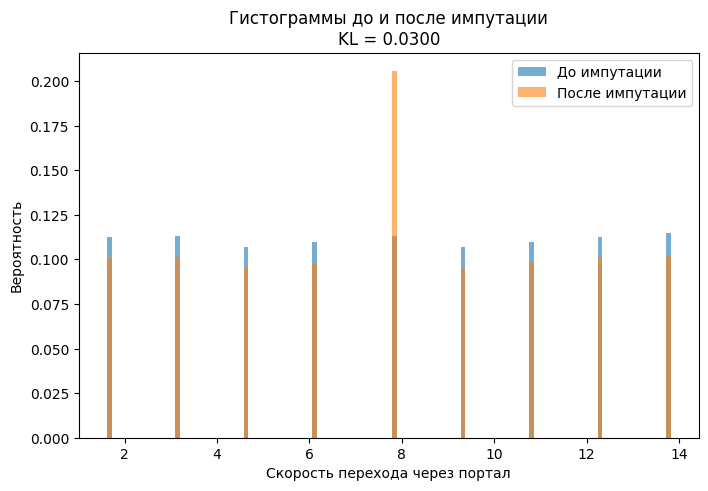

In [51]:
kl_feature_with_nan(X_train['Скорость перехода через портал'].values, 
                          X_train_speed_fill_mean.values, feature_name='Скорость перехода через портал')

**Заполним медианой**

In [39]:
X_train_speed_fill_median = X_train['Скорость перехода через портал'].fillna(X_train['Скорость перехода через портал'].median())

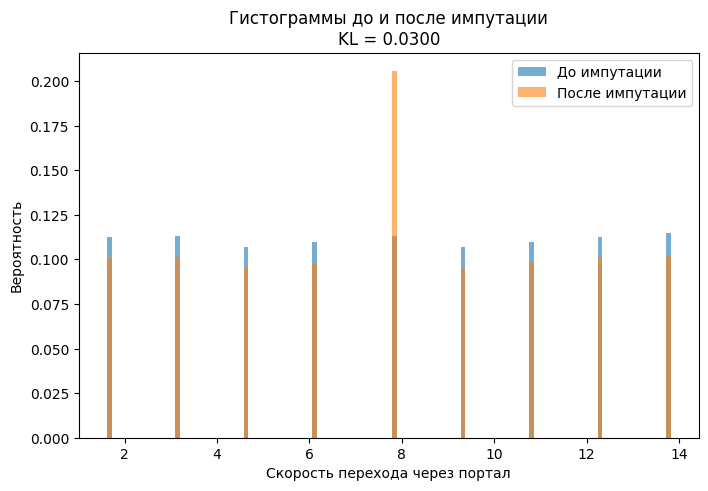

In [52]:
kl_feature_with_nan(X_train['Скорость перехода через портал'].values, 
                          X_train_speed_fill_median.values, feature_name='Скорость перехода через портал')

Метрика KL почти стремится к 0, что говорит о том, что наш подход хорошо объясняет исходное распределение

##### Машинные подходы

**MICE**

MICE (Multiple Imputation by Chained Equations) — метод, который итеративно предсказывает пропуски одного признака через остальные признаки. Каждый признак с NaN предсказывается через остальные признаки, используя регрессию.

Но для этого метода нужно чтобы все столбцы были числовыми

In [57]:
np.unique(X_train.select_dtypes(include=['object']))

array(['Выше среднего', 'Ниже среднего', 'Сильный', 'Слабый'],
      dtype=object)

Можем заметить что у нас есть порядок, используем Label кодирование

In [66]:
order = ['Слабый', 'Ниже среднего', 'Выше среднего', 'Сильный']

X_train_encoded = X_train.copy()
X_train_encoded = X_train_encoded.drop(columns=['Тип Вектора Мощи'])
X_train_encoded['Тип Вектора Мощи'] = pd.Categorical(X_train['Тип Вектора Мощи'], categories=order, ordered=True).codes

In [67]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

mice_imputer = IterativeImputer(random_state=42, max_iter=15)
X_train_mice = mice_imputer.fit_transform(X_train_encoded)
X_train_mice = pd.DataFrame(X_train_mice, columns=X_train.columns)

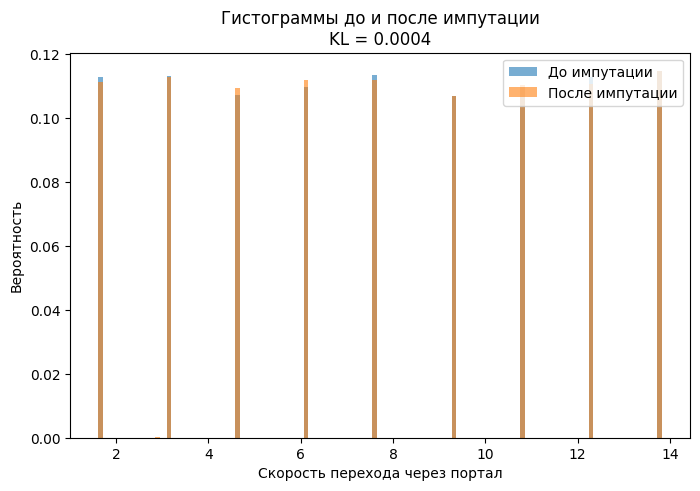

In [69]:
kl_feature_with_nan(X_train['Скорость перехода через портал'].values, 
                          X_train_mice['Скорость перехода через портал'].values, feature_name='Скорость перехода через портал')

**KNNImputer**

Для каждой строки с пропусками ищем K ближайших соседей по другим признакам.
Пропущенное значение заменяется средним (или медианой) значения этого признака у соседей.

In [70]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=7)
X_train_knn = knn_imputer.fit_transform(X_train_encoded)
X_train_knn = pd.DataFrame(X_train_knn, columns=X_train.columns)

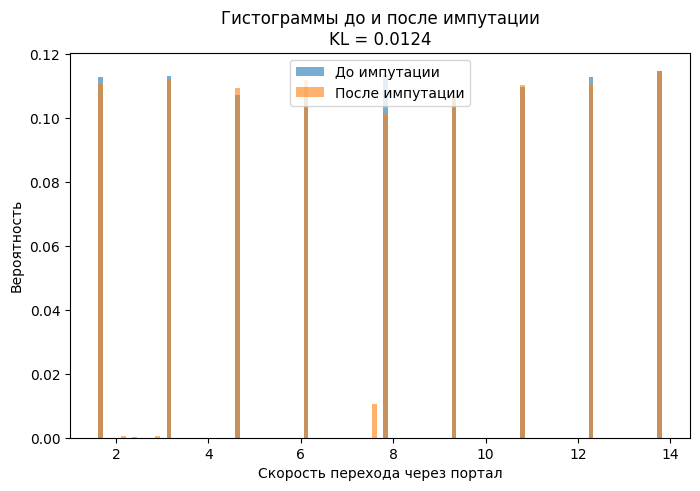

In [71]:
kl_feature_with_nan(X_train['Скорость перехода через портал'].values, 
                          X_train_knn['Скорость перехода через портал'].values, feature_name='Скорость перехода через портал')

Явным победителем становится MICE, его и будем использовать

In [81]:
X_train['Скорость перехода через портал'] = X_train_mice['Скорость перехода через портал'].values

Наш mice_imputer теперь будет заполнять пропуски везде в вещественных признаках, даже если в тренировочном датасете их не было

#### 1.1.4.2. <a id='toc1_1_4_2_'></a>[Обработка категориальных признаков](#toc0_)

Можем заметить, что в нашей тренировочной выборке нету пропущенных категориальных признаков. Но в тесте они могут быть и следовательно это нужно учесть

Так как признак у нас один, мы будем заполнять пропуски модой

In [91]:
from sklearn.impute import SimpleImputer

cat_imputer = SimpleImputer(strategy='most_frequent')
cat_imputer.fit(X_train[['Тип Вектора Мощи']])

,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""median"", then replace missing values using the median along each column. Can only be used with numeric data.- If ""most_frequent"", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.- If ""constant"", then replace missing values with fill_value. Can be used with strings or numeric data.- If an instance of Callable, then replace missing values using the scalar statistic returned by running the callable over a dense 1d array containing non-missing values of each column... versionadded:: 0.20 strategy=""constant"" for fixed value imputation... versionadded:: 1.5 strategy=callable for custom value imputation.",'most_frequent'
,"fill_value fill_value: str or numerical value, default=NoneWhen strategy == ""constant"", `fill_value` is used to replace alloccurrences of missing_values. For string or object data types,`fill_value` must be a string.If `None`, `fill_value` will be 0 when imputing numericaldata and ""missing_value"" for strings or object data types.",None
,"copy copy: bool, default=TrueIf True, a copy of X will be created. If False, imputation willbe done in-place whenever possible. Note that, in the following cases,a new copy will always be made, even if `copy=False`:- If `X` is not an array of floating values;- If `X` is encoded as a CSR matrix;- If `add_indicator=True`.",True
,"add_indicator add_indicator: bool, default=FalseIf True, a :class:`MissingIndicator` transform will stack onto outputof the imputer's transform. This allows a predictive estimatorto account for missingness despite imputation. If a feature has nomissing values at fit/train time, the feature won't appear onthe missing indicator even if there are missing values attransform/test time.",False
,"keep_empty_features keep_empty_features: bool, default=FalseIf True, features that consist exclusively of missing values when`fit` is called are returned in results when `transform` is called.The imputed value is always `0` except when `strategy=""constant""`in which case `fill_value` will be used instead... versionadded:: 1.2",False


Теперь, если у нас будут пропуски в категориальном столбце, импутер его заменит на самое частое значение в тренировочной выборке

In [93]:
X_train.isna().sum()

Вектор Мощи                       0
Скорость перехода через портал    0
Приток Силы Потока                0
Ритм магического ядра             0
Поток Энергий                     0
Сила Левого Потока                0
Сила Правого Потока               0
Пламя Стихий                      0
Приток давления Выдоха Истока     0
Давление выдоха Истока            0
Печать Чародея                    0
Эмульсия Истока                   0
Дыхание Истока                    0
Тип Вектора Мощи                  0
dtype: int64

От пропусков в данных мы избавились

### 1.1.5. <a id='toc1_1_5_'></a>[Кодирование категориальных прзнаков](#toc0_)

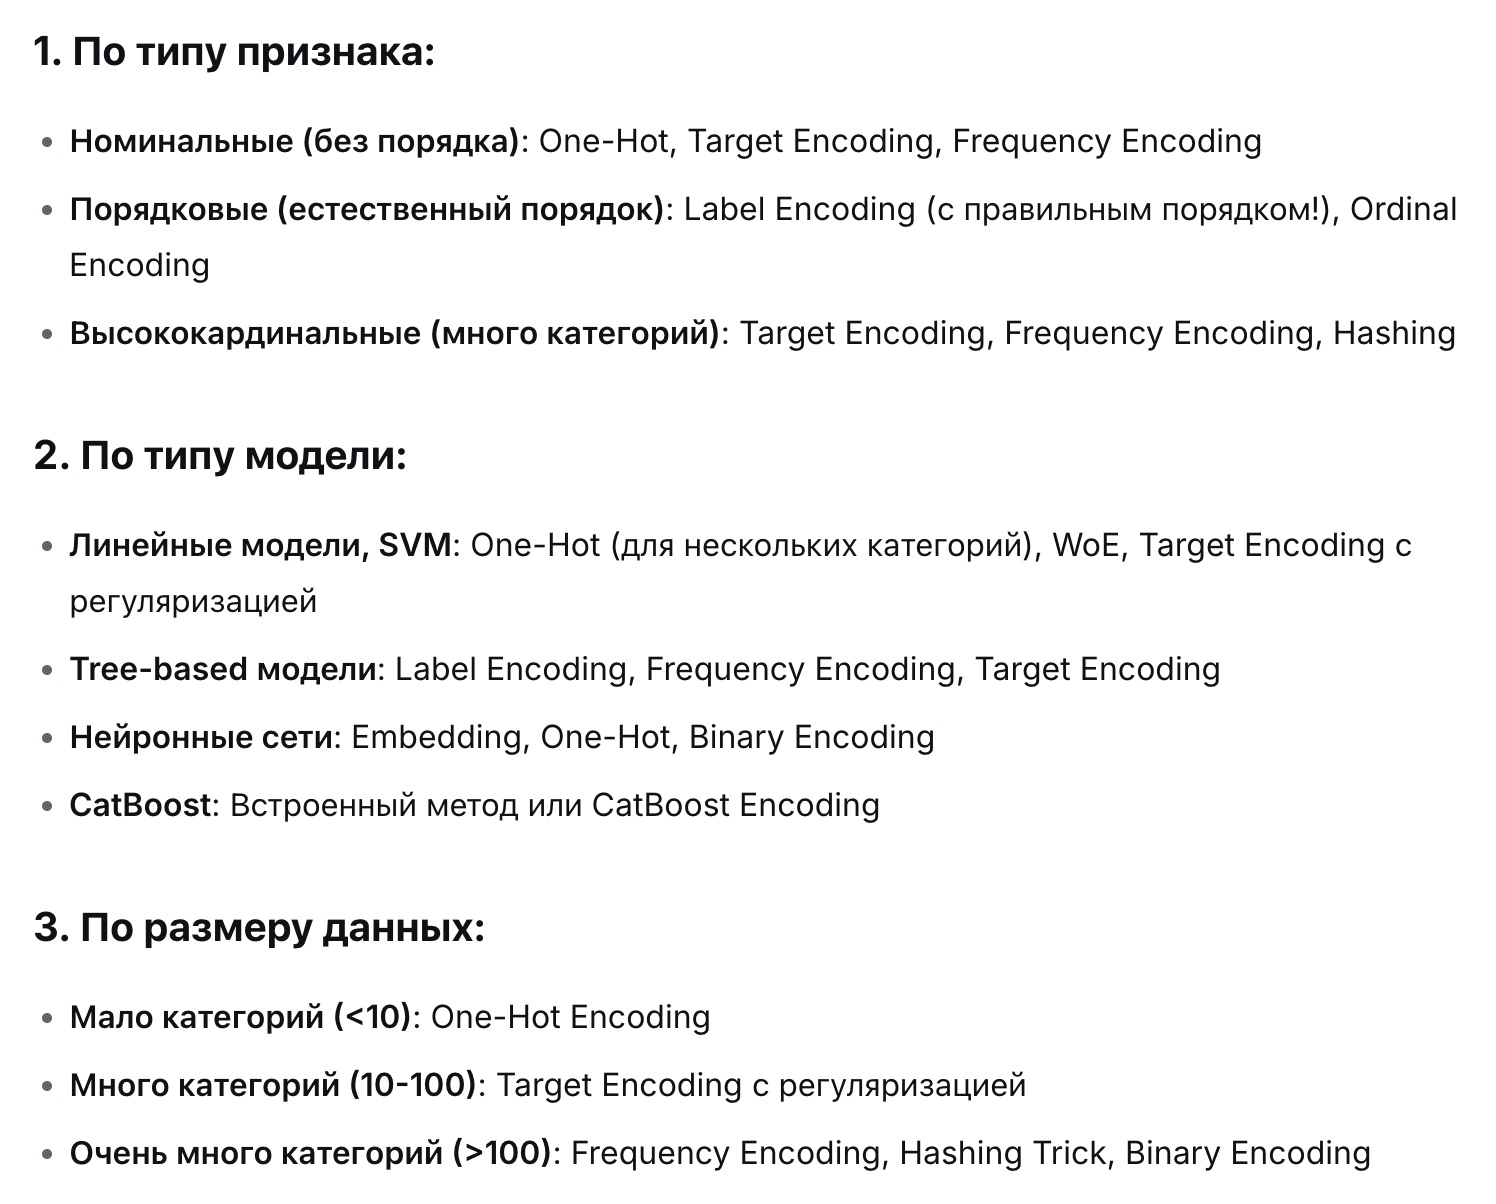

Проверим категориальные признаки:

In [32]:
X_train.select_dtypes(include=['object']).columns

Index(['Тип Вектора Мощи'], dtype='object')

In [94]:
np.unique(X_train.select_dtypes(include=['object']))

array(['Выше среднего', 'Ниже среднего', 'Сильный', 'Слабый'],
      dtype=object)

У нас всего один столбец

Можем заметить что у нас есть порядок, используем Label кодирование

In [97]:
order = ['Слабый', 'Ниже среднего', 'Выше среднего', 'Сильный']

X_train['Тип Вектора Мощи'] = pd.Categorical(X_train['Тип Вектора Мощи'], categories=order, ordered=True).codes

In [99]:
X_train.head(5)

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Приток давления Выдоха Истока,Давление выдоха Истока,Печать Чародея,Эмульсия Истока,Дыхание Истока,Тип Вектора Мощи
6796,2.088,3.08664,2952.875000,143.773209,6764.362793,27.444000,27.444000,505.429993,1.205,6.546,5.411000,0.132,0.979,0
5274,1.138,1.54332,1321.094971,145.227661,6689.856934,9.625000,9.625000,474.640991,1.141,6.118,0.000000,0.096,0.972,0
1233,1.138,1.54332,2357.621094,147.781677,6727.043945,11.187000,11.187000,517.210999,1.184,6.394,0.000000,0.139,0.955,0
7501,5.140,7.71660,21626.277344,201.512955,8465.168945,175.255997,175.255997,713.469971,2.088,11.234,25.549999,0.506,0.982,2
6188,6.175,9.25992,29766.980469,241.587845,8810.953125,245.960007,245.960007,774.353027,2.507,13.250,34.268002,0.678,0.976,2


В предсказании будем сначала заполнять модой, после уже использовать Label кодирование 

##### **Применение к тесту**

In [112]:
X_test['Тип Вектора Мощи'] = cat_imputer.transform(X_test[['Тип Вектора Мощи']]).ravel()

X_test['Тип Вектора Мощи'] = pd.Categorical(X_test['Тип Вектора Мощи'], categories=order, ordered=True).codes

X_test = mice_imputer.transform(X_test)

X_test = pd.DataFrame(X_test, columns=X_train.columns)


In [113]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2984 entries, 0 to 2983
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Вектор Мощи                     2984 non-null   float32
 1   Скорость перехода через портал  2984 non-null   float32
 2   Приток Силы Потока              2984 non-null   float32
 3   Ритм магического ядра           2984 non-null   float32
 4   Поток Энергий                   2984 non-null   float32
 5   Сила Левого Потока              2984 non-null   float32
 6   Сила Правого Потока             2984 non-null   float32
 7   Пламя Стихий                    2984 non-null   float32
 8   Приток давления Выдоха Истока   2984 non-null   float32
 9   Давление выдоха Истока          2984 non-null   float32
 10  Печать Чародея                  2984 non-null   float32
 11  Эмульсия Истока                 2984 non-null   float32
 12  Дыхание Истока                  29

In [114]:
X_test.head()

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Приток давления Выдоха Истока,Давление выдоха Истока,Печать Чародея,Эмульсия Истока,Дыхание Истока,Тип Вектора Мощи
0,8.206,12.34656,50994.710938,323.326233,9316.363281,438.118011,438.118011,927.710022,3.573,18.360001,60.473000,1.197,0.963,3.0
1,4.161,6.17328,14723.849609,162.050262,7792.118164,113.792000,113.792000,649.671021,1.657,8.933000,17.576000,0.348,0.958,1.0
2,1.138,1.54332,5018.937012,147.098785,6682.833008,10.671000,10.671000,576.041992,1.276,6.853000,0.019000,0.219,0.986,0.0
3,9.300,13.88988,72777.914062,372.847046,9776.802734,645.164001,645.164001,1080.743042,4.492,22.367001,89.271004,1.767,0.965,3.0
4,9.300,13.88988,72760.156250,372.841187,9737.459961,644.973022,644.973022,1069.244019,4.540,22.950001,89.167999,1.765,0.988,3.0


Все применили к тесту